In [2]:
import pandas as pd
import numpy as np
# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

config = {
    "mathtext.fontset": 'stix',
    "font.family": 'serif',
    "font.serif": ['Arial'],
    "font.size": 24,
    'axes.unicode_minus': False
}
rcParams.update(config)
plt.rcParams['axes.unicode_minus'] = False
large = 22
med = 16
small = 12
params = {
    'axes.titlesize': large,
    'legend.fontsize': med,
    'figure.figsize': (8, 6),
    'axes.labelsize': med,
    'axes.titlesize': med,
    'xtick.labelsize': med,
    'ytick.labelsize': med,
    'figure.titlesize': large
}
plt.rcParams.update(params)
plt.rcParams['figure.dpi'] = 300
seed = 42

In [3]:
import subprocess
import re
import pandas as pd

def get_magpie_plus_features(formulas:pd.Series):
    input_file = "inputFile"
    output_file = "out.csv"
    with open('inputFile', 'w') as f:
        formulas.to_csv(f, index=False, header=False, sep='\n')
    
    def run_java_program():
        command = ['java', '-jar', 'MaterialDescriptors.jar', input_file, '0', output_file]
        output = subprocess.check_output(command, stderr=subprocess.STDOUT)
        output_str = output.decode()
        comp_number = re.findall(r'\d+', output_str)[0]
        print(f'Successfully generated{comp_number}chemical formula features！')
    run_java_program()

    return pd.read_csv(output_file)

In [4]:
def remove_collinear_features(x, threshold):
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    return x

In [5]:
db = pd.read_csv('./data/db_cn.csv')
db

,material_id,formula_pretty,formation_energy_per_atom,energy_above_hull,is_gap_direct,band_gap,spacegroup_number,structure,formula,composition,is_GGA_U
0,mp-1113578,Cs2AgAsBr6,-1.374468,0.000000,False,1.1161,225,Full Formula (Cs2 Ag1 As1 Br6)\nReduced Formul...,Cs2AgAsBr6,Cs2 Ag1 As1 Br6,0
1,mp-1113543,Cs2AgAsCl6,-1.562978,0.008312,False,1.5886,225,Full Formula (Cs2 Ag1 As1 Cl6)\nReduced Formul...,Cs2AgAsCl6,Cs2 Ag1 As1 Cl6,0
2,mp-1114305,Cs2AgAsF6,-2.436756,0.055656,False,2.4428,225,Full Formula (Cs2 Ag1 As1 F6)\nReduced Formula...,Cs2AgAsF6,Cs2 Ag1 As1 F6,0
3,mp-1113575,Cs2AgAuBr6,-1.255402,0.024743,False,0.0000,225,Full Formula (Cs2 Ag1 Au1 Br6)\nReduced Formul...,Cs2AgAuBr6,Cs2 Ag1 Au1 Br6,0
4,mp-568448,Cs2AgAuCl6,-1.395263,0.054055,False,0.0000,225,Full Formula (Cs2 Ag1 Au1 Cl6)\nReduced Formul...,Cs2AgAuCl6,Cs2 Ag1 Au1 Cl6,0
...,...,...,...,...,...,...,...,...,...,...,...
1286,mp-1114193,Rb2YHgI6,-1.377484,0.104343,False,0.0000,225,Full Formula (Rb2 Y1 Hg1 I6)\nReduced Formula:...,Rb2YHgI6,Rb2 Y1 Hg1 I6,0
1287,mp-1114129,Rb2YInBr6,-1.954103,0.016794,True,2.8332,225,Full Formula (Rb2 Y1 In1 Br6)\nReduced Formula...,Rb2YInBr6,Rb2 Y1 In1 Br6,0
1288,mp-1114045,Rb2YInCl6,-2.216514,0.041253,False,3.3242,225,Full Formula (Rb2 Y1 In1 Cl6)\nReduced Formula...,Rb2YInCl6,Rb2 Y1 In1 Cl6,0
1289,mp-1113931,Rb2YInF6,-3.290900,0.045683,False,3.6730,225,Full Formula (Rb2 Y1 In1 F6)\nReduced Formula:...,Rb2YInF6,Rb2 Y1 In1 F6,0


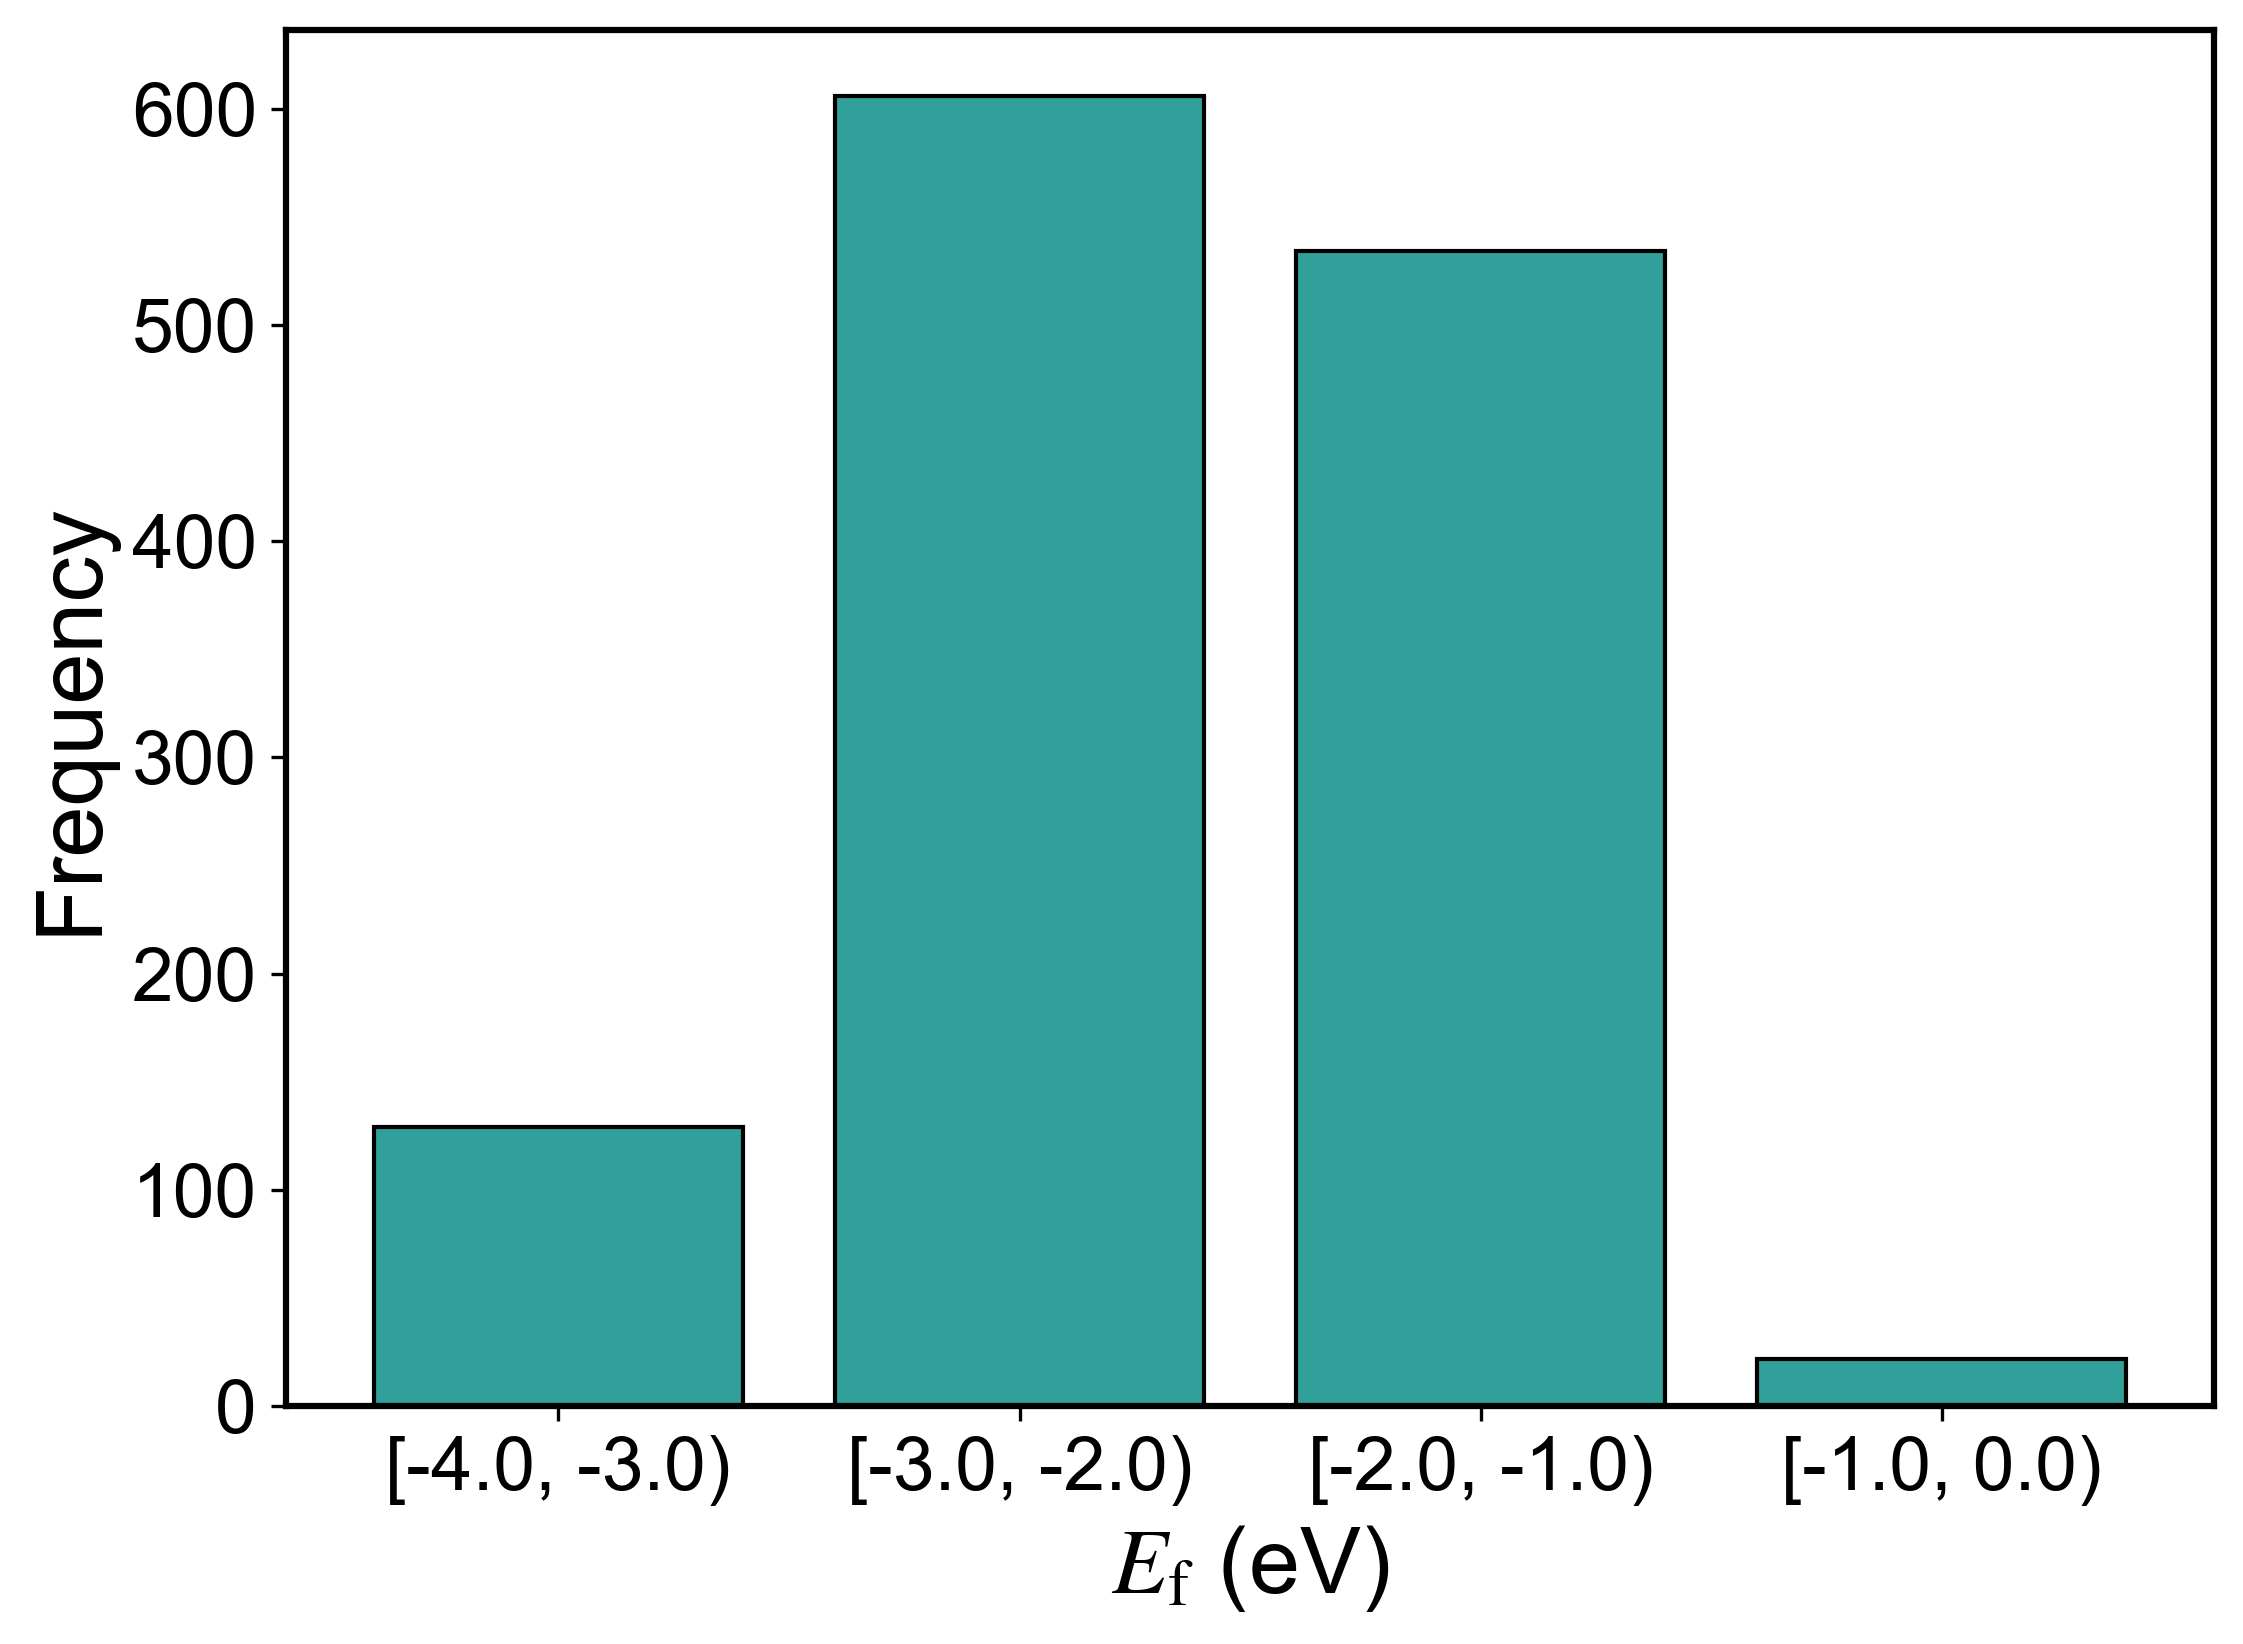

In [6]:
import numpy as np
import matplotlib.pyplot as plt

data = db['formation_energy_per_atom']

data_min = np.floor(data.min())
data_max = np.ceil(data.max())

bin_width = 1
bin_edges = np.arange(data_min, data_max + bin_width, bin_width)

counts, bins, patches = plt.hist(data, bins=bin_edges, color='#31A09A',
                                  edgecolor='black', align='mid', rwidth=0.8)

bin_labels = [f'[{bins[i]:.1f}, {bins[i+1]:.1f})' for i in range(len(bins)-1)]
plt.xticks(bins[:-1] + bin_width/2, bin_labels, rotation=0, ha='center')

plt.xlabel(r'$E_{\mathrm{f}} $ (eV)', fontsize=22)
plt.ylabel('Frequency', fontsize=22)

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
    spine.set_edgecolor('black')
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.tick_params(axis='x', which='major', labelsize=18)
ax.tick_params(axis='y', which='major', labelsize=18)

plt.tight_layout()
plt.savefig('./picture/Ef_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
features = pd.read_csv('./data/features_cn.csv')
features

,A_Density,B_Density,C_Density,X_Density,A_dipole Polarizability,B_dipole Polarizability,C_dipole Polarizability,X_dipole Polarizability,A_covalent Radius,B_covalent Radius,C_covalent Radius,X_covalent Radius,A_atomic Radius,B_atomic Radius,C_atomic Radius,X_atomic Radius,A_FirstIonization,B_FirstIonization,C_FirstIonization,X_FirstIonization,A_number of Valence Electrons,B_number of Valence Electrons,C_number of Valence Electrons,X_number of Valence Electrons,A_number,B_number,C_number,X_number,A_Period,B_Period,...,A-B_covalent Radius,A-C_covalent Radius,(A+B+C)-X_covalent Radius,A-B_atomic Radius,A-C_atomic Radius,(A+B+C)-X_atomic Radius,A-B_FirstIonization,A-C_FirstIonization,(A+B+C)-X_FirstIonization,A-B_number of Valence Electrons,A-C_number of Valence Electrons,(A+B+C)-X_number of Valence Electrons,A-B_number,A-C_number,(A+B+C)-X_number,A-B_Period,A-C_Period,(A+B+C)-X_Period,A-B_Electronegativity,A-C_Electronegativity,(A+B+C)-X_Electronegativity,A-B_number of s+p Electrons,A-C_number of s+p Electrons,(A+B+C)-X_number of s+p Electrons,A-B_number of d Electrons,A-C_number of d Electrons,(A+B+C)-X_number of d Electrons,A-B_Mulliken EN,A-C_Mulliken EN,(A+B+C)-X_Mulliken EN
0,3.74,10.50,5.78,18.72000,801.8,55.0,30.00,126.00,464,128,121,684,5.2,1.6,1.15,6.9,751.4,731.0,947.0,6839.4,2,11,5,42,110,47,33,210,12,5,...,336,343,29,3.6,4.05,1.05,20.4,195.6,4410.0,9,3,24,63,77,20,7,8,3,0.35,0.60,12.07,1,3,34,10,0,10,0.08,0.94,31.44
1,3.74,10.50,5.78,0.01926,801.8,55.0,30.00,87.60,464,128,121,594,5.2,1.6,1.15,6.0,751.4,731.0,947.0,7507.2,2,11,5,42,110,47,33,102,12,5,...,336,343,119,3.6,4.05,1.95,20.4,195.6,5077.8,9,3,24,63,77,88,7,8,3,0.35,0.60,13.27,1,3,34,10,0,10,0.08,0.94,35.70
2,3.74,10.50,5.78,0.01020,801.8,55.0,30.00,22.44,464,128,121,384,5.2,1.6,1.15,3.0,751.4,731.0,947.0,10086.0,2,11,5,42,110,47,33,54,12,5,...,336,343,329,3.6,4.05,4.95,20.4,195.6,7656.6,9,3,24,63,77,136,7,8,9,0.35,0.60,18.19,1,3,34,10,0,10,0.08,0.94,48.36
3,3.74,10.50,19.30,18.72000,801.8,55.0,36.00,126.00,464,128,124,684,5.2,1.6,1.35,6.9,751.4,731.0,890.1,6839.4,2,11,11,42,110,47,79,210,12,5,...,336,340,32,3.6,3.85,1.25,20.4,138.7,4466.9,9,9,18,63,31,26,7,6,1,0.35,0.96,11.71,1,1,38,10,10,20,0.08,1.41,30.97
4,3.74,10.50,19.30,0.01926,801.8,55.0,36.00,87.60,464,128,124,594,5.2,1.6,1.35,6.0,751.4,731.0,890.1,7507.2,2,11,11,42,110,47,79,102,12,5,...,336,340,122,3.6,3.85,2.15,20.4,138.7,5134.7,9,9,18,63,31,134,7,6,5,0.35,0.96,12.91,1,1,38,10,10,20,0.08,1.41,35.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,3.06,4.47,13.50,29.58000,639.6,162.0,33.91,197.40,420,163,133,798,4.7,1.8,1.50,8.4,806.0,600.0,1007.1,6050.4,2,3,12,42,74,39,80,318,10,5,...,257,287,82,2.9,3.20,0.40,206.0,201.1,3637.3,1,10,25,35,6,125,5,4,9,0.42,0.36,11.10,0,0,36,1,10,49,1.49,0.23,27.78
1287,3.06,4.47,7.31,18.72000,639.6,162.0,65.00,126.00,420,163,142,684,4.7,1.8,1.55,6.9,806.0,600.0,558.3,6839.4,2,3,3,42,74,39,49,210,10,5,...,257,278,41,2.9,3.15,1.15,206.0,247.7,4875.1,1,1,34,35,25,48,5,5,4,0.42,0.14,13.12,0,1,35,1,10,11,1.49,1.58,34.57
1288,3.06,4.47,7.31,0.01926,639.6,162.0,65.00,87.60,420,163,142,594,4.7,1.8,1.55,6.0,806.0,600.0,558.3,7507.2,2,3,3,42,74,39,49,102,10,5,...,257,278,131,2.9,3.15,2.05,206.0,247.7,5542.9,1,1,34,35,25,60,5,5,2,0.42,0.14,14.32,0,1,35,1,10,11,1.49,1.58,38.83
1289,3.06,4.47,7.31,0.01020,639.6,162.0,65.00,22.44,420,163,142,384,4.7,1.8,1.55,3.0,806.0,600.0,558.3,10086.0,2,3,3,42,74,39,49,54,10,5,...,257,278,341,2.9,3.15,5.05,206.0,247.7,8121.7,1,1,34,35,25,108,5,5,8,0.42,0.14,19.24,0,1,35,1,10,11,1.49,1.58,51.49


In [9]:
y = db['formation_energy_per_atom']
X = features

In [10]:
from sklearn.model_selection import train_test_split
X = remove_collinear_features(X, 0.8)
print(X.shape)

(1291, 28)


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def fold5_reg_f(model, X, y, name='', is_plot=True):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    models = []  
    mse_scores = []
    mae_scores = []
    r2_scores = []
    fig, ax = plt.subplots()
    for i, (train_index, test_index) in enumerate(kf.split(X, y)):
        try:
            X = X.values
            y = y.values
        except:
            pass
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        models.append(model)
        y_pred = model.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        print(f"Fold {i+1} MSE: {mse} MAE: {mae}  R2: {r2}")
        mse_scores.append(mse)
        mae_scores.append(mae)
        r2_scores.append(r2)
        
        if is_plot:
            ax.scatter(y_test, y_pred, label=f'Fold {i+1}', alpha=0.5)
            ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1.7, linestyle='--')
            ax.tick_params(axis='both', which='major', labelsize=20) 
            ax.set_xlabel(r'True $ E_{\mathrm{f}} $ (eV/atom)',fontsize=22)
            ax.set_ylabel(r'Predicted $ E_{\mathrm{f}} $ (eV/atom)',fontsize=22)
            #ax.set_title(f'Predictions: {name}', fontweight='bold')
            ax.legend(loc="upper left",fontsize=18)
            ax.grid(True, linestyle='--', linewidth=1, alpha=0.5)
            ax = plt.gca()  
            ax.spines['top'].set_linewidth(1.5)
            ax.spines['bottom'].set_linewidth(1.5)
            ax.spines['left'].set_linewidth(1.5)
            ax.spines['right'].set_linewidth(1.5)
            ax.grid(False)

    result = {
        'mean_squared_error': np.mean(mse_scores),
        'mean_absolute_error': np.mean(mae_scores),
        'r2_score': np.mean(r2_scores),
        'mse_std': np.std(mse_scores),
        'mae_std': np.std(mae_scores),
        'r2_std': np.std(r2_scores),
    }
    if is_plot:
        ax.text(0.95, 0.05, f'R$^2$: {result["r2_score"]:.3f}\nMAE: {result["mean_absolute_error"]:.3f}\nMSE: {result["mean_squared_error"]:.3f}',
                transform=ax.transAxes,
                verticalalignment='bottom', horizontalalignment='right',
                bbox={"boxstyle":"round", "alpha":0.5, "facecolor":"white", "edgecolor":"black"},
                fontsize=18)

        #plt.savefig('./picture/fm_reg.png', dpi=300, bbox_inches='tight')
        plt.show()
    return result, models

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor

seed = 42
kn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=seed)
rf = RandomForestRegressor(n_jobs=-1, random_state=seed)
mlp = MLPRegressor(alpha=1, max_iter=1000, random_state=seed)
lgbm = LGBMRegressor(random_state=seed, verbose=0)
xb = XGBRegressor(random_state=seed, n_jobs=-1)
ext = ExtraTreesRegressor(n_jobs=-1, random_state=seed)
gbc = GradientBoostingRegressor(random_state=seed)

Fold 1 MSE: 0.009830118589365774 MAE: 0.052761221395302885  R2: 0.9758932884432638
Fold 2 MSE: 0.005279822153110691 MAE: 0.04996135481779858  R2: 0.9859455349207956
Fold 3 MSE: 0.006545857769453901 MAE: 0.05024180219046427  R2: 0.9829586028583801
Fold 4 MSE: 0.0058003614524208815 MAE: 0.05046386472159733  R2: 0.9866930908270682
Fold 5 MSE: 0.023176791783608815 MAE: 0.0535273937898304  R2: 0.9510888577584431


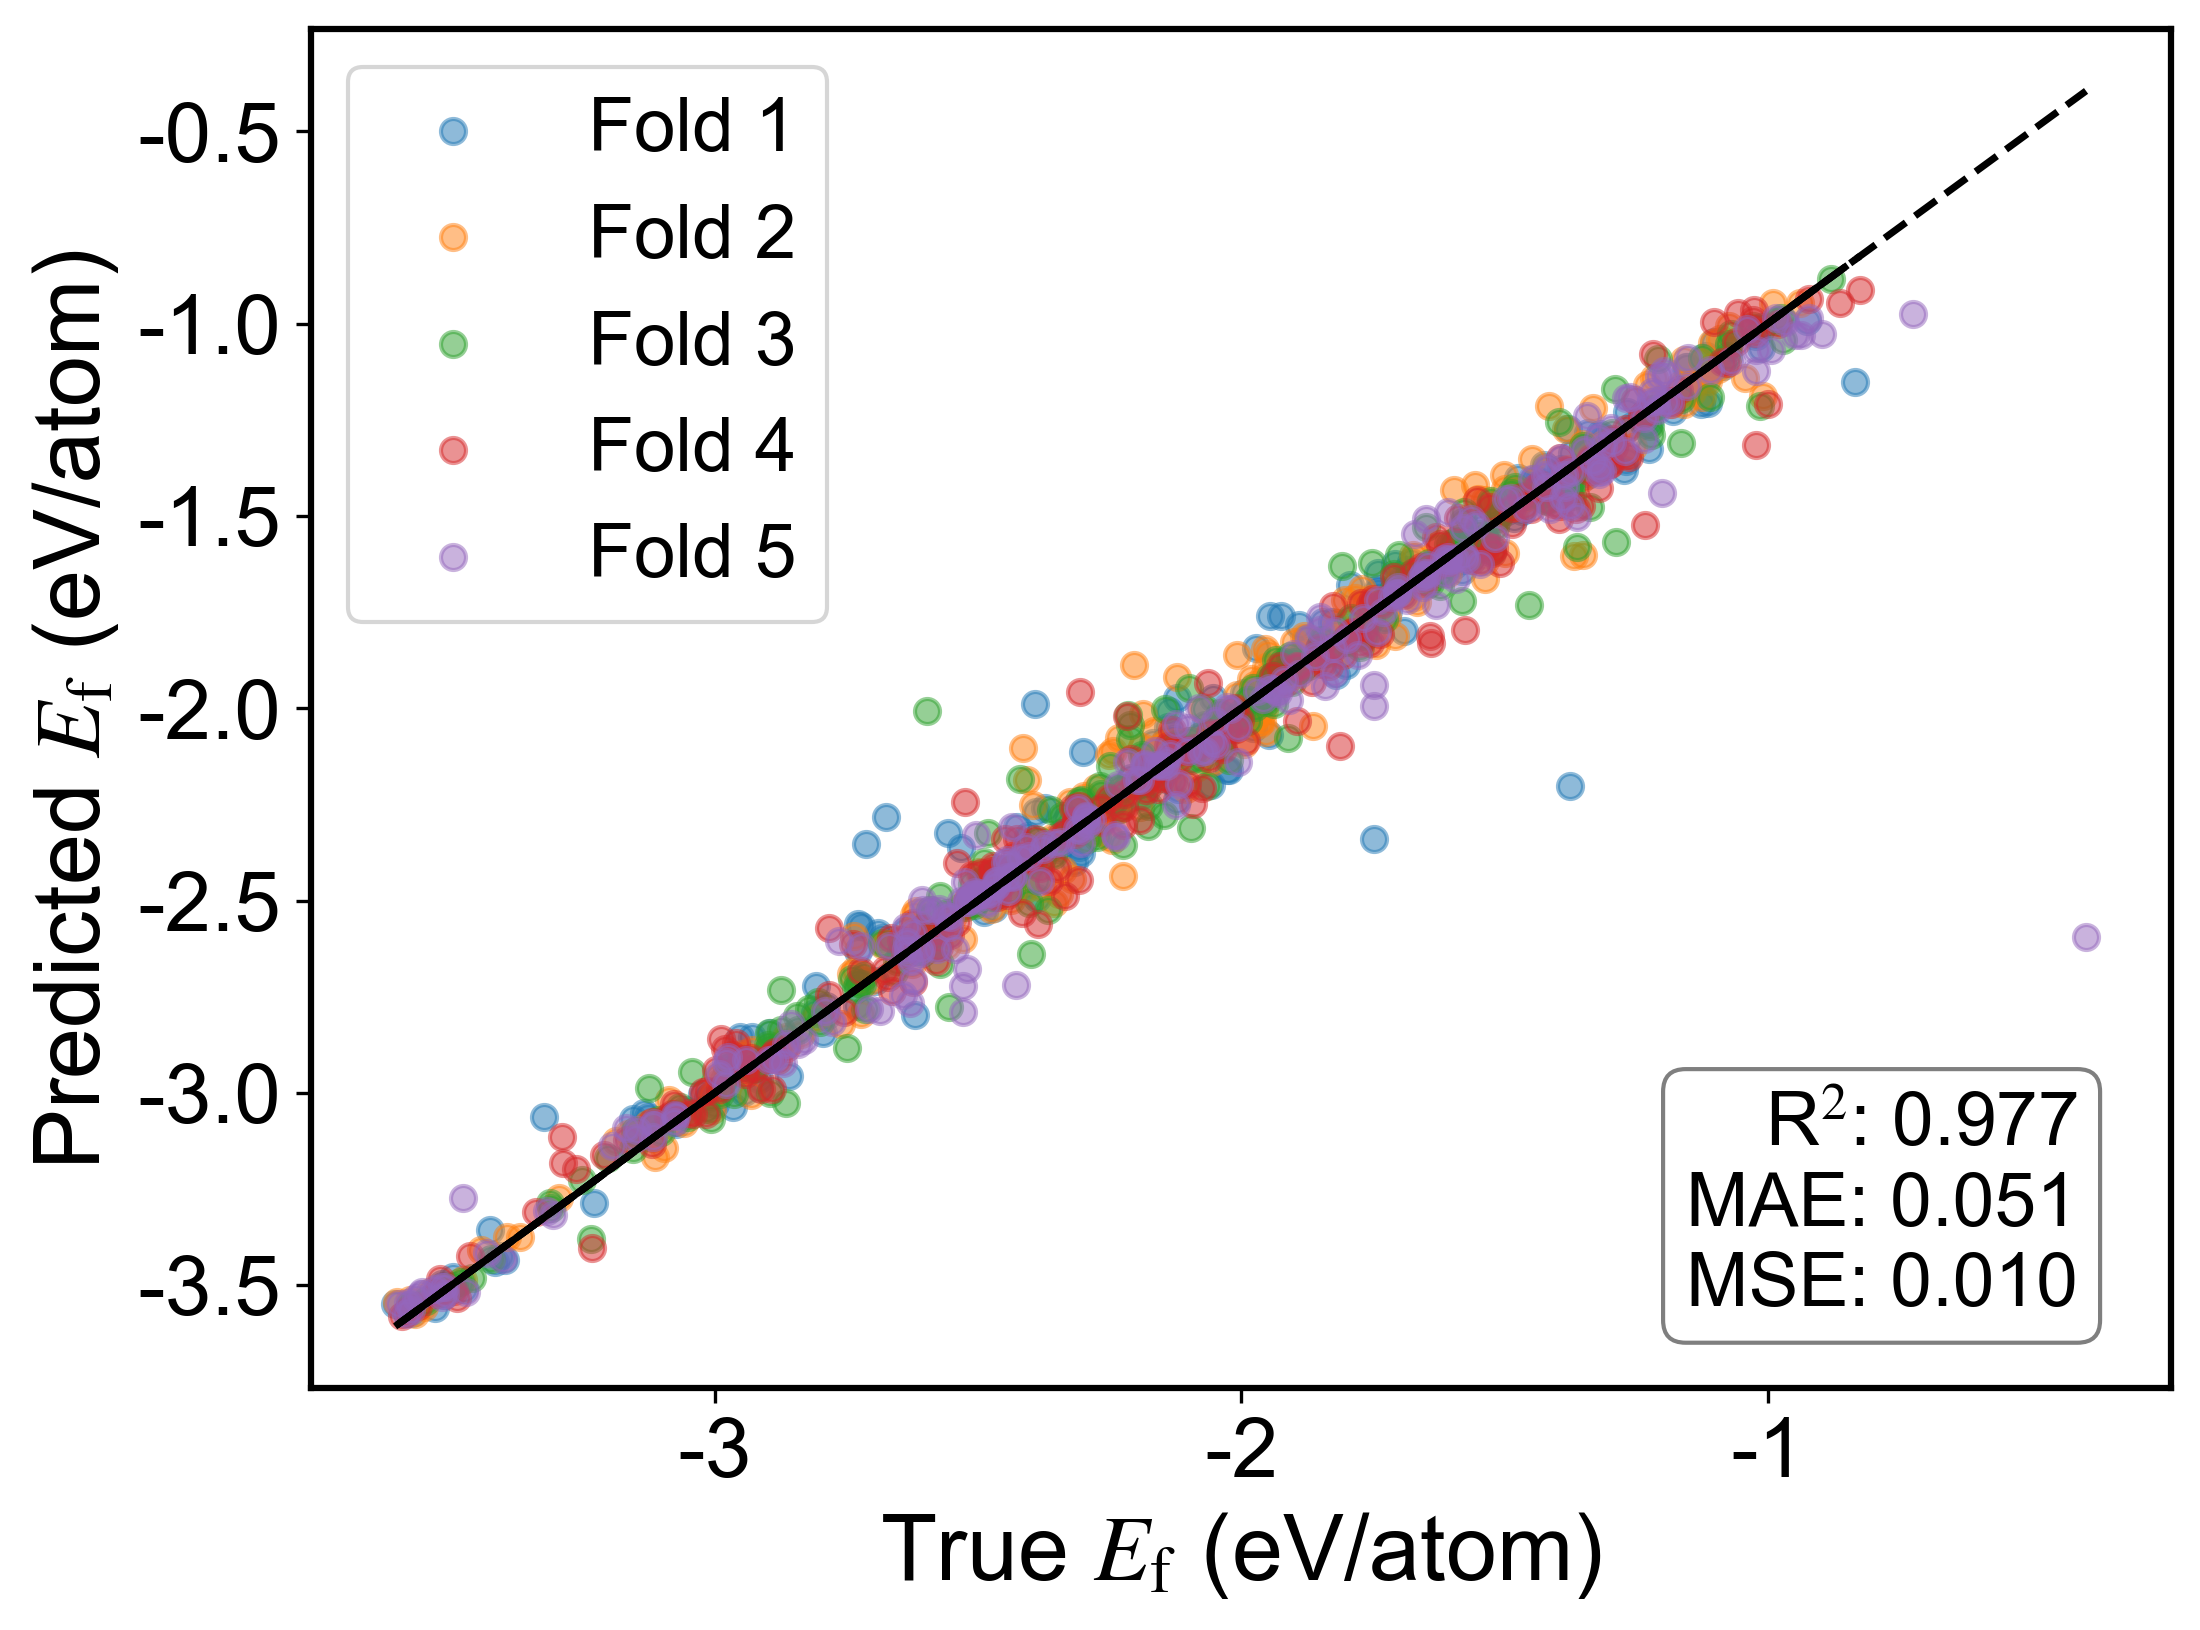

({'mean_squared_error': 0.010126590349592013,
  'mean_absolute_error': 0.05139112738299869,
  'r2_score': 0.9765158749615901,
  'mse_std': 0.006714532257791748,
  'mae_std': 0.0014605345455094038,
  'r2_std': 0.013273460515576149},
 [RandomForestRegressor(n_jobs=-1, random_state=42),
  RandomForestRegressor(n_jobs=-1, random_state=42),
  RandomForestRegressor(n_jobs=-1, random_state=42),
  RandomForestRegressor(n_jobs=-1, random_state=42),
  RandomForestRegressor(n_jobs=-1, random_state=42)])

In [13]:
fold5_reg_f(rf, X, y)

Fold 1 MSE: 0.011551208654770216 MAE: 0.0542533586452356  R2: 0.9716726046953837
Fold 2 MSE: 0.004115681918087173 MAE: 0.042355719542557776  R2: 0.9890443832921929
Fold 3 MSE: 0.006210697290760901 MAE: 0.042901954549039  R2: 0.9838311550928994
Fold 4 MSE: 0.005026242375803396 MAE: 0.04634358461754162  R2: 0.9884690374342031
Fold 5 MSE: 0.022598671308457743 MAE: 0.047782894935285626  R2: 0.9523088942957204


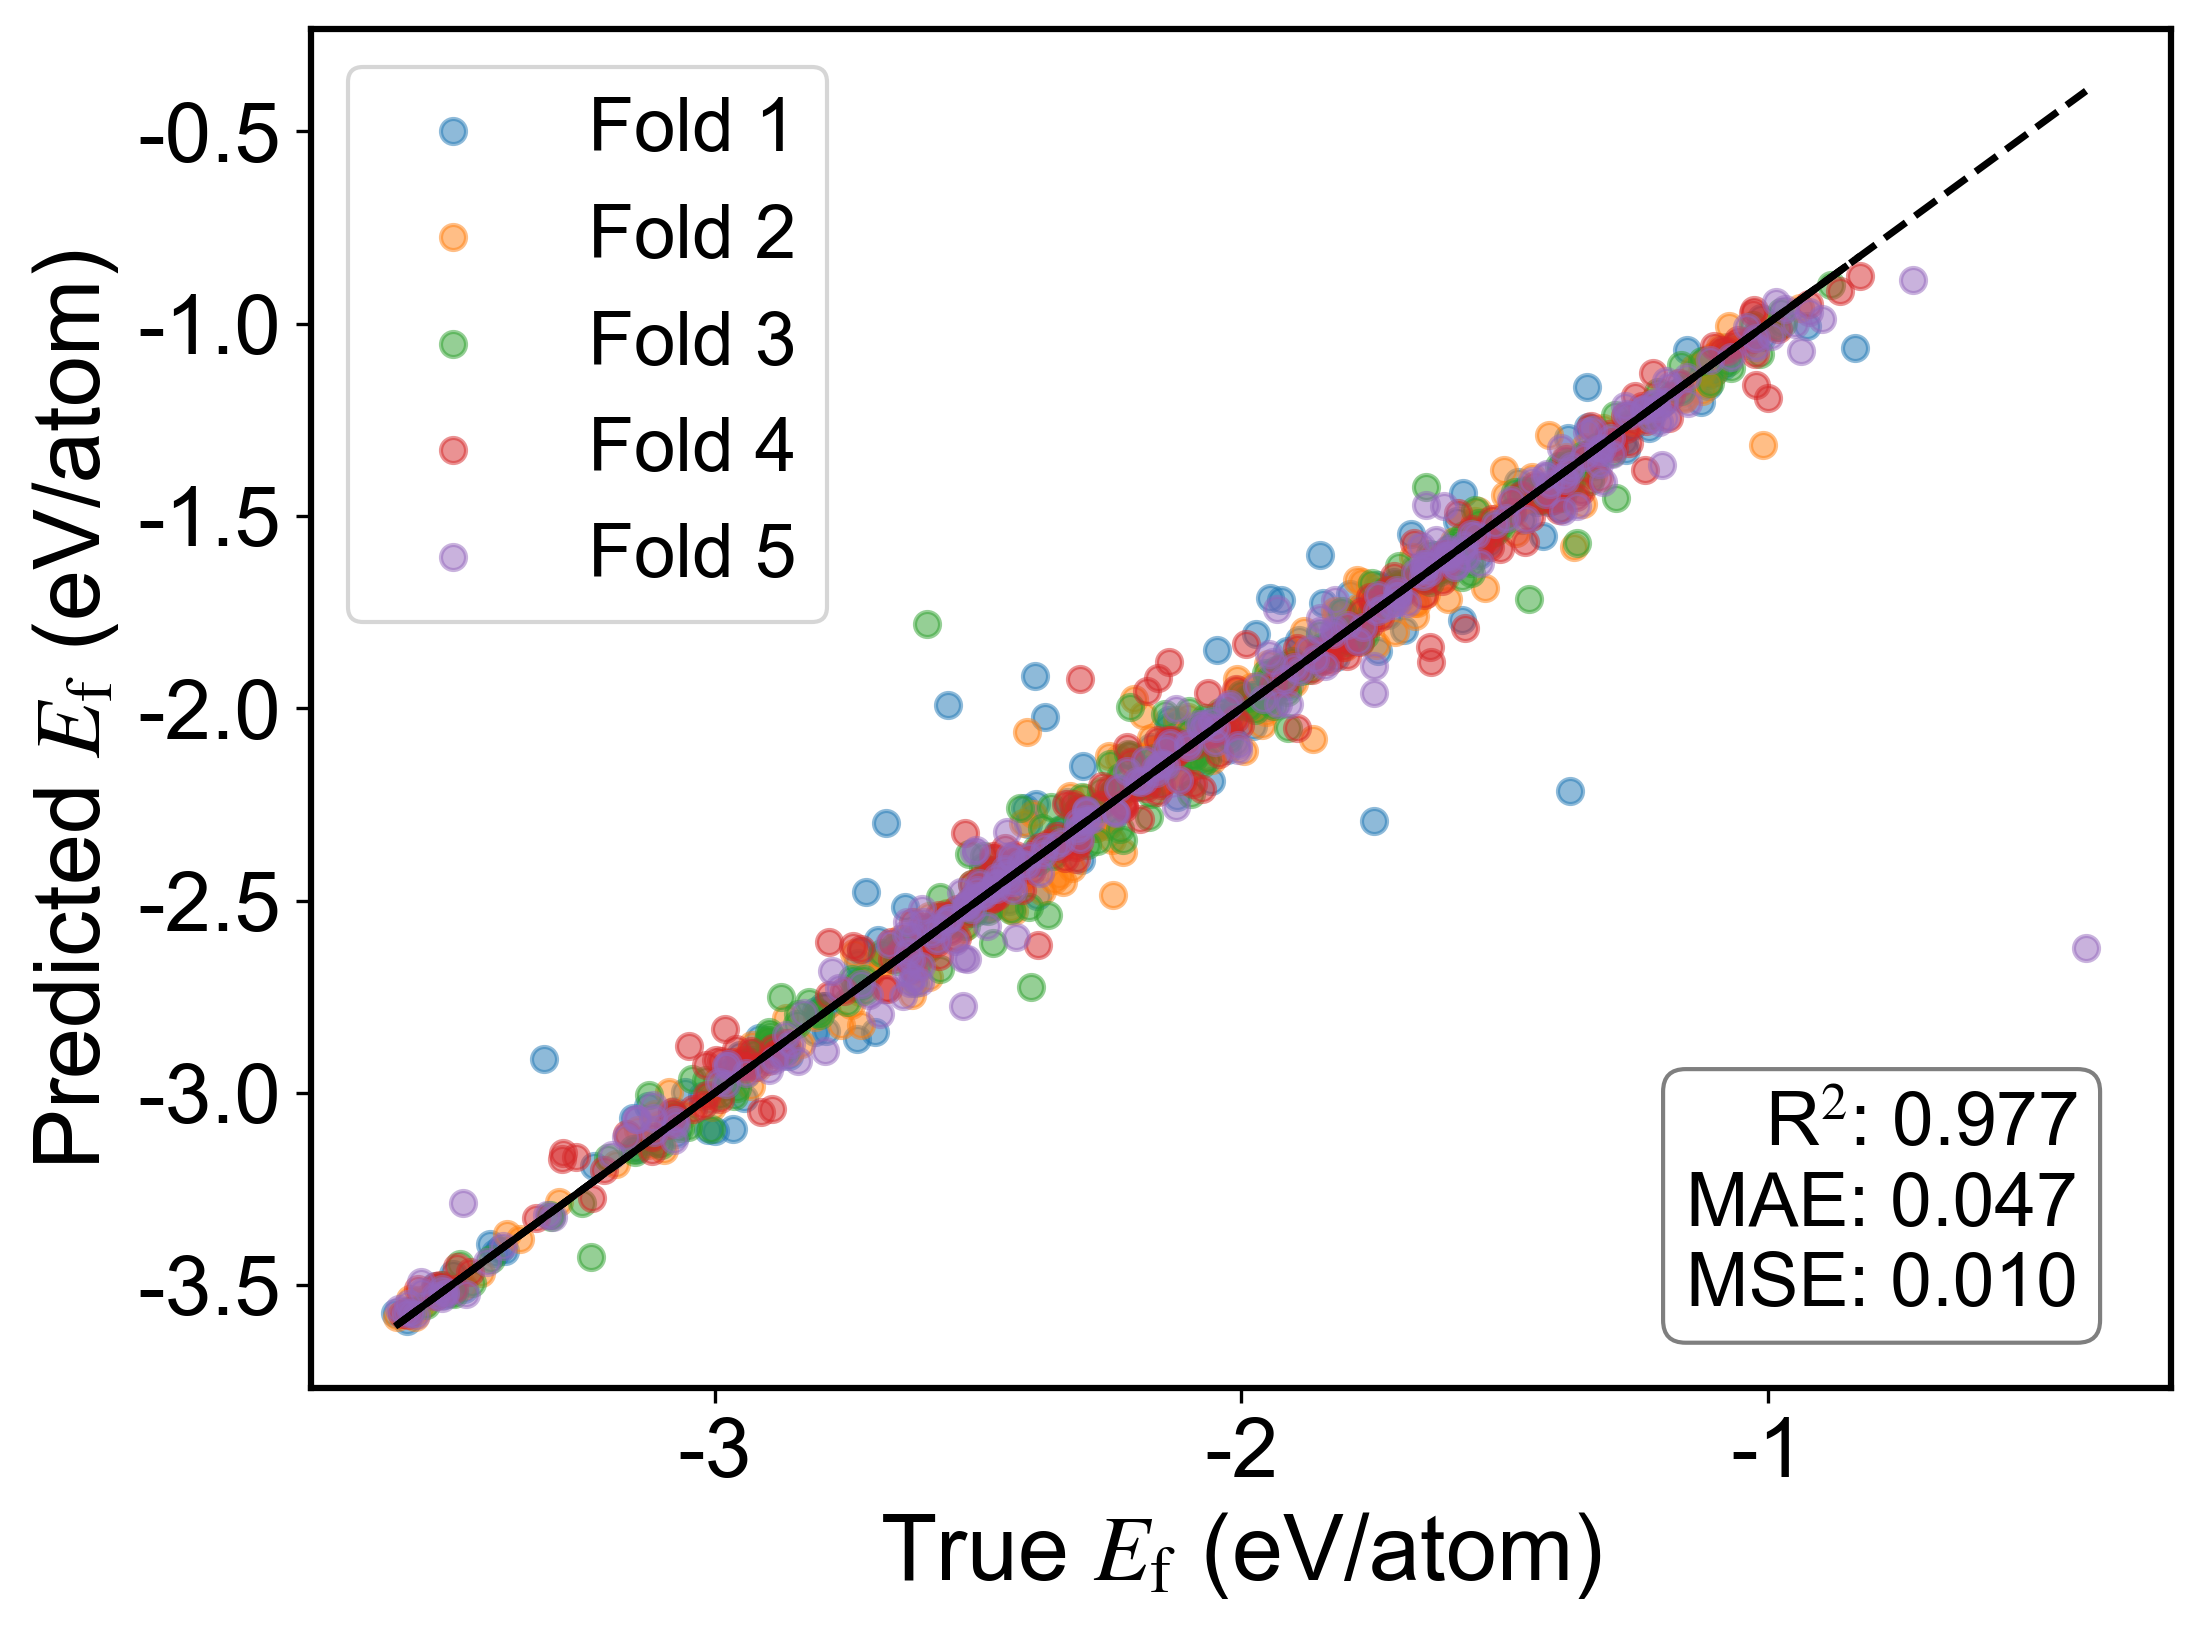

({'mean_squared_error': 0.009900500309575885,
  'mean_absolute_error': 0.046727502457931926,
  'r2_score': 0.97706521496208,
  'mse_std': 0.006852817600123978,
  'mae_std': 0.004281286260081054,
  'r2_std': 0.013865649967706626},
 [XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=-1,
               num_parallel_tree=None, random_state=42, ...),
  XG

In [14]:
fold5_reg_f(xb, X, y)

Fold 1 MSE: 0.00892818871663124 MAE: 0.04936871862742462  R2: 0.9781051196728419
Fold 2 MSE: 0.003871596283623101 MAE: 0.04308757603240491  R2: 0.9896941197655872
Fold 3 MSE: 0.0047327018140641205 MAE: 0.043876276399555436  R2: 0.9876789484270966
Fold 4 MSE: 0.004996986033597422 MAE: 0.047012225268905576  R2: 0.9885361559218457
Fold 5 MSE: 0.022517222499441603 MAE: 0.048845500546217904  R2: 0.9524807797887769


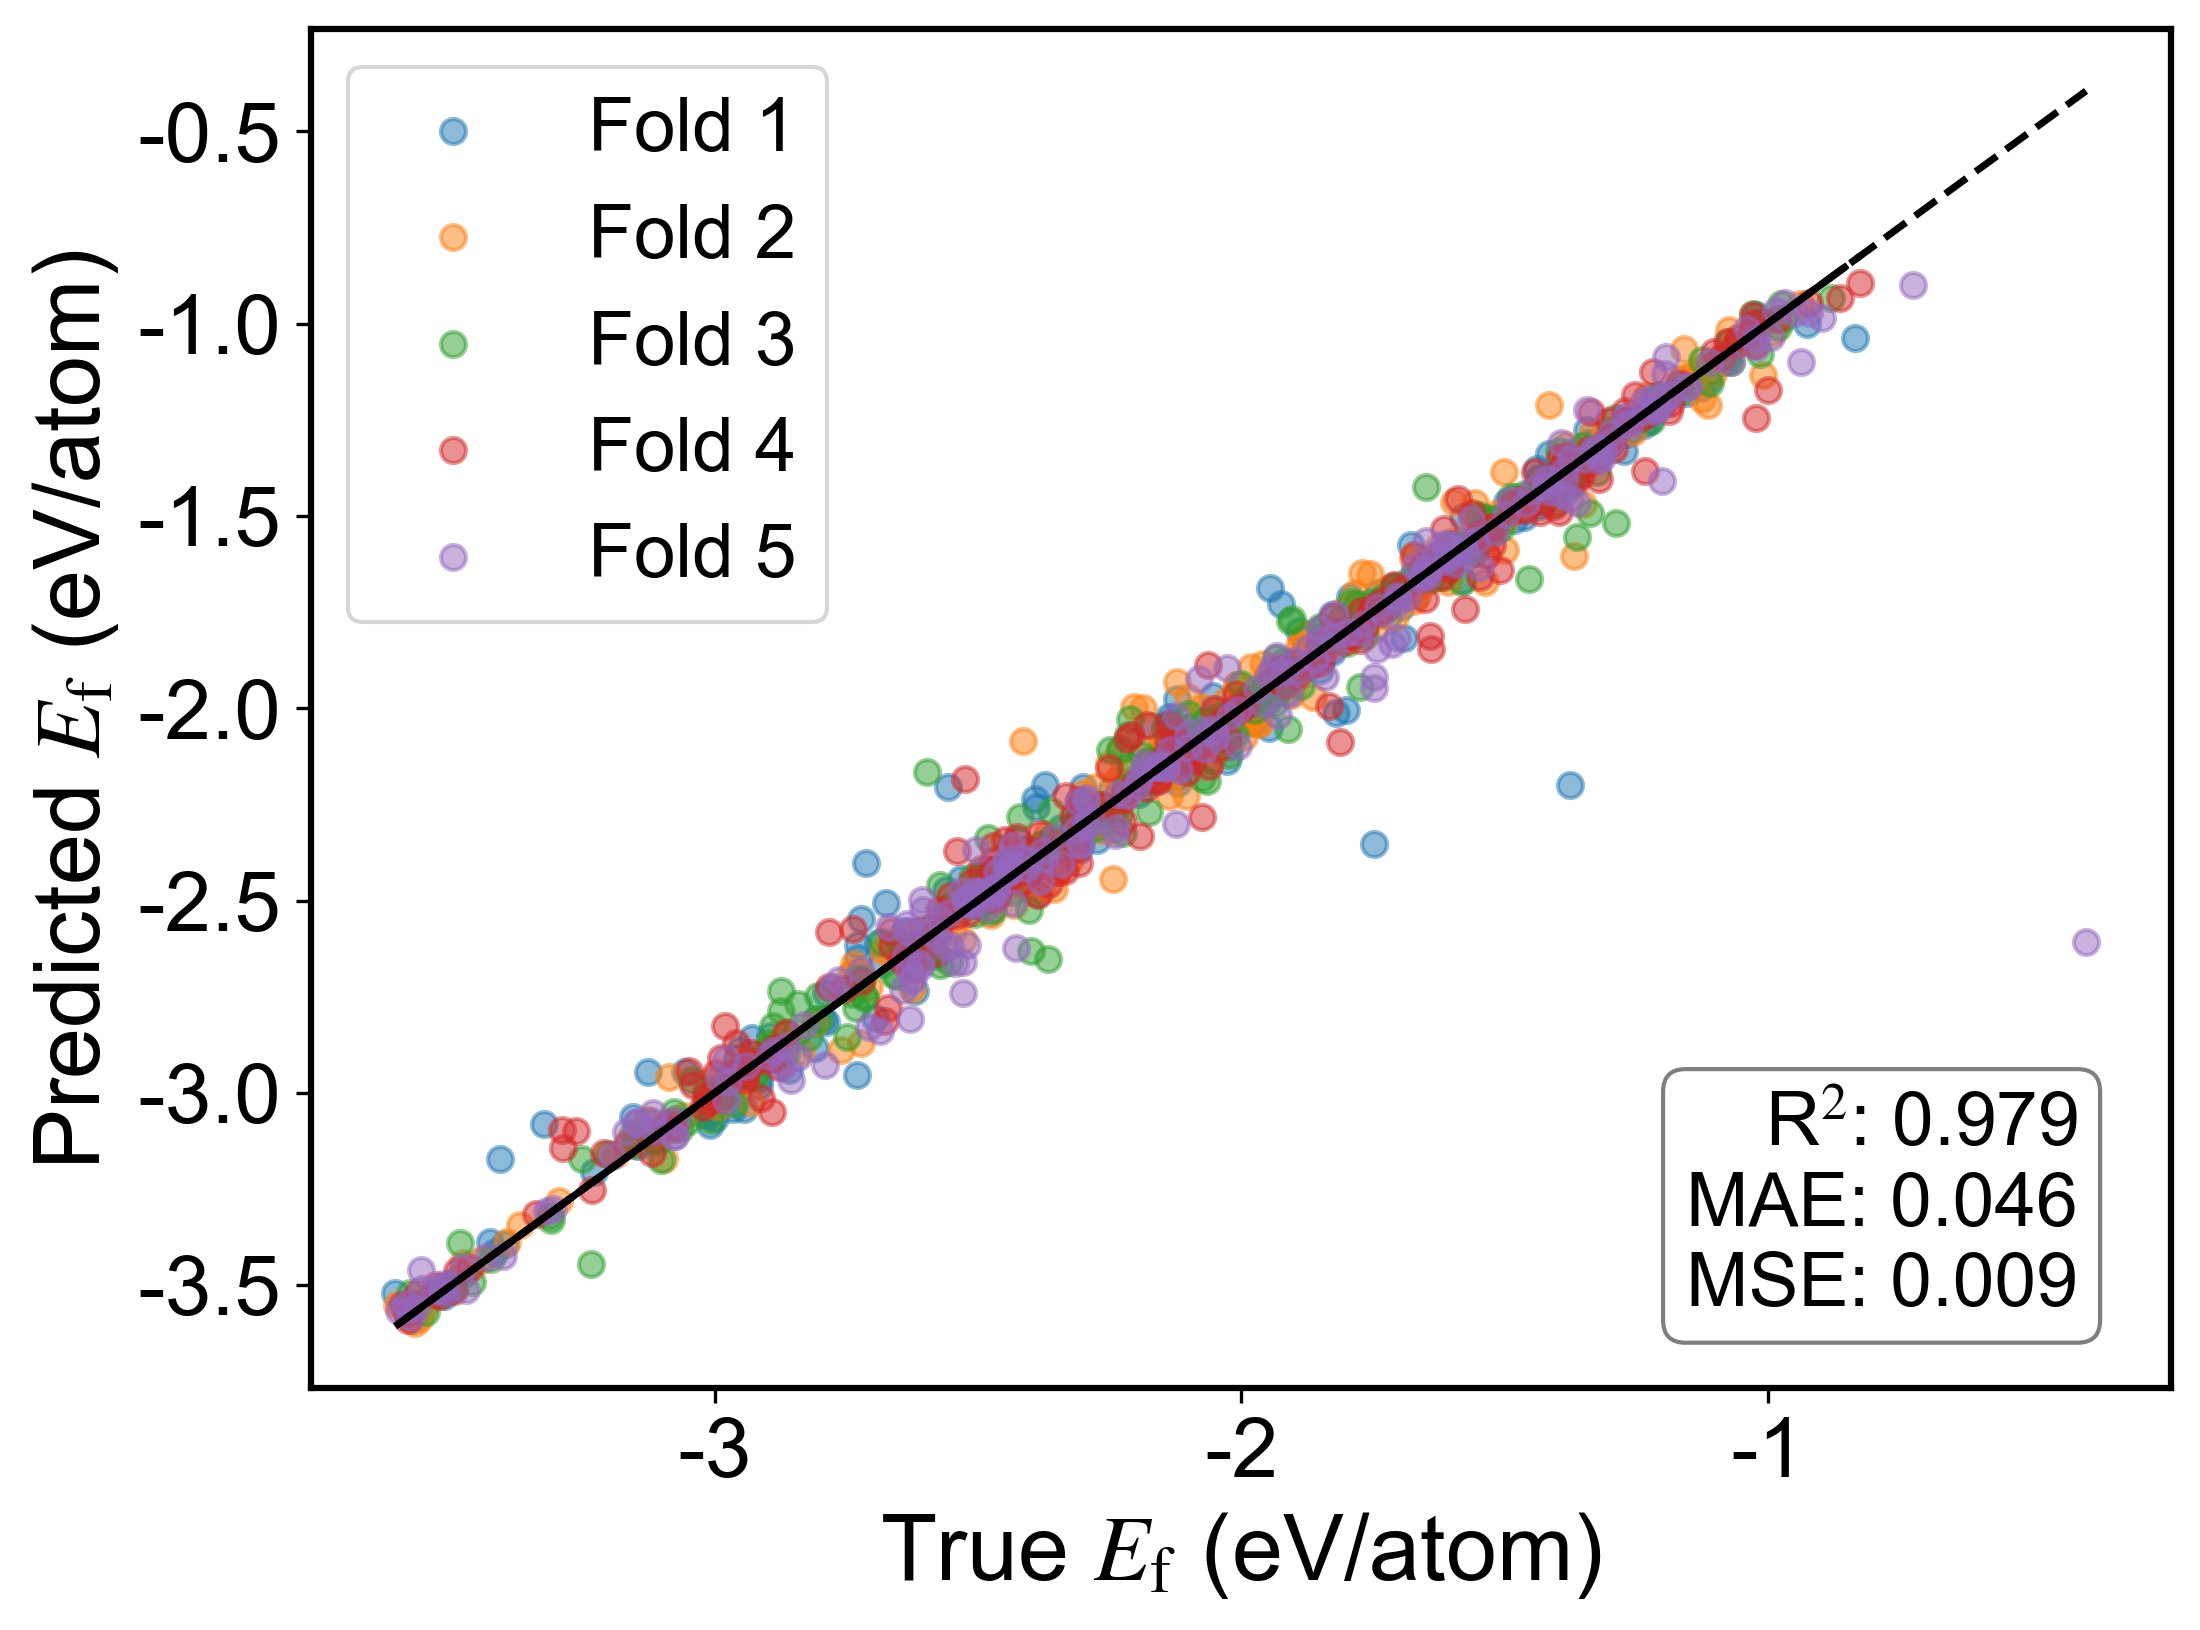

({'mean_squared_error': 0.009009339069471498,
  'mean_absolute_error': 0.04643805937490168,
  'r2_score': 0.9792990247152297,
  'mse_std': 0.0069750197730155655,
  'mae_std': 0.002549614628241148,
  'r2_std': 0.014030319922484782},
 [LGBMRegressor(random_state=42, verbose=0),
  LGBMRegressor(random_state=42, verbose=0),
  LGBMRegressor(random_state=42, verbose=0),
  LGBMRegressor(random_state=42, verbose=0),
  LGBMRegressor(random_state=42, verbose=0)])

In [15]:
fold5_reg_f(lgbm, X, y)

Fold 1 MSE: 0.007731494295696228 MAE: 0.042699220613206405  R2: 0.9810398113517647
Fold 2 MSE: 0.004191621826188357 MAE: 0.03898257951919378  R2: 0.9888422373191705
Fold 3 MSE: 0.007240749331207236 MAE: 0.04102143858418478  R2: 0.9811495316119104
Fold 4 MSE: 0.0031611644750878373 MAE: 0.03470171985156026  R2: 0.9927478090984941
Fold 5 MSE: 0.02114851098336228 MAE: 0.042180466015215856  R2: 0.9553692401190784


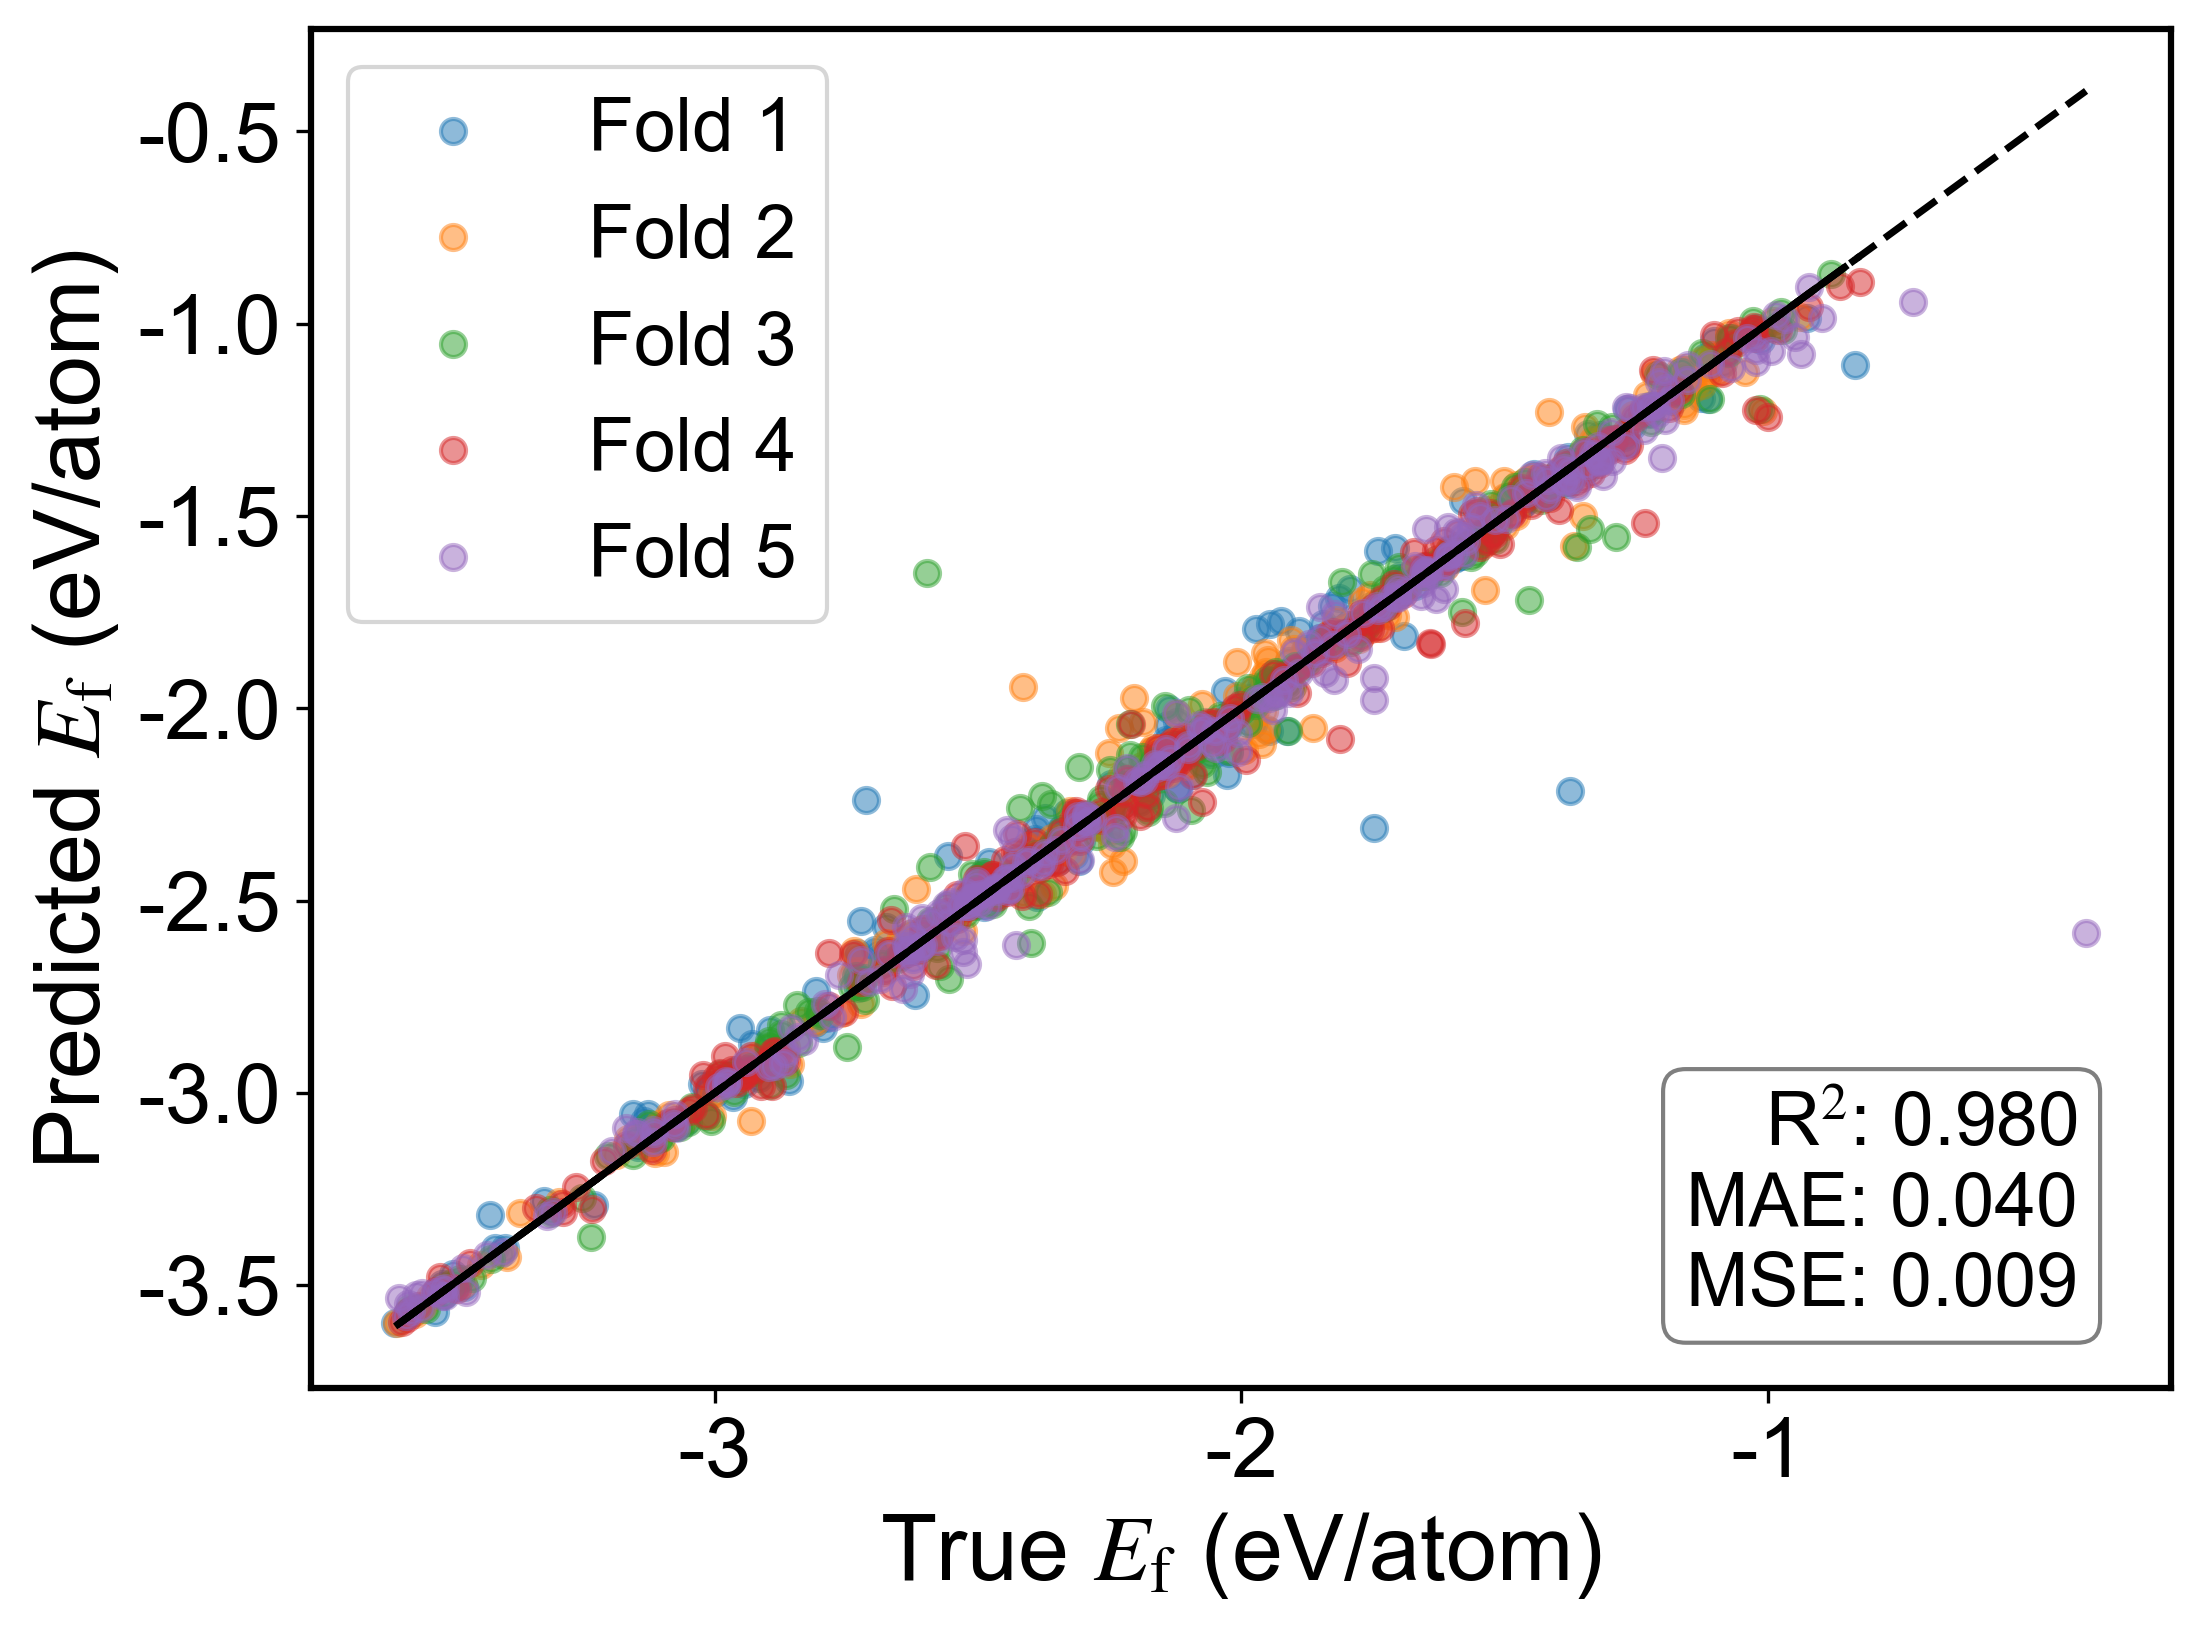

{'mean_squared_error': 0.00869470818230839,
 'mean_absolute_error': 0.039917084916672216,
 'r2_score': 0.9798297259000837,
 'mse_std': 0.00646586226624091,
 'mae_std': 0.002903656424387342,
 'r2_std': 0.013035519123995993}

In [16]:
ext_result, ext_models = fold5_reg_f(ext, X, y)
ext_result

In [17]:
from joblib import dump

dump(ext_models, './model/formation_ext.joblib')
# loaded_model = load(model_filename)

['./model/formation_ext.joblib']

In [22]:
feature_set = list(X.columns)

# predict candidate formation energy

In [19]:
screen = pd.read_csv('./data/screen.csv')
screen

,formula,number
0,Li2NaBF6,1
1,Li2NaNF6,1
2,Li2CuAlF6,1
3,Li2CuPF6,1
4,Li2CuCrF6,1
...,...,...
7032,Nd2LiCuF6,3
7033,Nd2NaCuF6,3
7034,Eu2LiCuF6,3
7035,Tm2LiCuF6,3


In [20]:
data = pd.read_csv('./data/data_tf.csv')
data

,formula,number,A_Density,B_Density,C_Density,X_Density,A_dipole Polarizability,B_dipole Polarizability,C_dipole Polarizability,X_dipole Polarizability,A_covalent Radius,B_covalent Radius,C_covalent Radius,X_covalent Radius,A_atomic Radius,B_atomic Radius,C_atomic Radius,X_atomic Radius,A_FirstIonization,B_FirstIonization,C_FirstIonization,X_FirstIonization,A_number of Valence Electrons,B_number of Valence Electrons,C_number of Valence Electrons,X_number of Valence Electrons,A_number,B_number,C_number,X_number,...,A-B_covalent Radius,A-C_covalent Radius,(A+B+C)-X_covalent Radius,A-B_atomic Radius,A-C_atomic Radius,(A+B+C)-X_atomic Radius,A-B_FirstIonization,A-C_FirstIonization,(A+B+C)-X_FirstIonization,A-B_number of Valence Electrons,A-C_number of Valence Electrons,(A+B+C)-X_number of Valence Electrons,A-B_number,A-C_number,(A+B+C)-X_number,A-B_Period,A-C_Period,(A+B+C)-X_Period,A-B_Electronegativity,A-C_Electronegativity,(A+B+C)-X_Electronegativity,A-B_number of s+p Electrons,A-C_number of s+p Electrons,(A+B+C)-X_number of s+p Electrons,A-B_number of d Electrons,A-C_number of d Electrons,(A+B+C)-X_number of d Electrons,A-B_Mulliken EN,A-C_Mulliken EN,(A+B+C)-X_Mulliken EN
0,Li2NaBF6,1,1.068,0.971,2.34000,0.0102,328.225,162.7000,20.5,22.44,266,155,85,384,2.9,1.80,0.85,3.0,1040.4,495.8,800.6,10086.0,2,1,3,42,6,11,5,54,...,111,181,122,1.10,2.05,2.55,544.6,239.8,7749.2,1,1,36,5,1,32,1,2,3,1.03,0.08,18.95,1,1,36,0,0,0,3.17,1.73,49.30
1,Li2NaNF6,1,1.068,0.971,0.00125,0.0102,328.225,162.7000,7.4,22.44,266,155,71,384,2.9,1.80,0.65,3.0,1040.4,495.8,1402.3,10086.0,2,1,5,42,6,11,7,54,...,111,195,108,1.10,2.25,2.35,544.6,361.9,7147.5,1,3,34,5,1,30,1,2,3,1.03,1.08,17.95,1,3,34,0,0,0,3.17,1.28,46.29
2,Li2CuAlF6,1,1.068,8.960,2.70000,0.0102,328.225,46.5000,57.8,22.44,266,112,126,384,2.9,1.35,1.25,3.0,1040.4,745.5,577.5,10086.0,2,11,3,42,6,29,13,54,...,154,140,120,1.55,1.65,2.50,294.9,462.9,7722.6,9,1,26,23,7,6,0,1,1,0.06,0.35,18.41,1,1,36,10,0,10,1.54,2.79,48.73
3,Li2CuPF6,1,1.068,8.960,1.82000,0.0102,328.225,46.5000,25.0,22.44,266,112,111,384,2.9,1.35,1.00,3.0,1040.4,745.5,1011.8,10086.0,2,11,5,42,6,29,15,54,...,154,155,105,1.55,1.90,2.25,294.9,28.6,7288.3,9,3,24,23,9,4,0,1,1,0.06,0.23,17.83,1,3,34,10,0,10,1.54,0.40,46.34
4,Li2CuCrF6,1,1.068,8.960,7.15000,0.0102,328.225,46.5000,83.0,22.44,266,112,122,384,2.9,1.35,1.40,3.0,1040.4,745.5,652.9,10086.0,2,11,6,42,6,29,24,54,...,154,144,116,1.55,1.50,2.65,294.9,387.5,7647.2,9,4,23,23,18,5,0,0,0,0.06,0.30,18.36,1,1,38,10,5,15,1.54,2.30,48.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9081,Nd2LiCuF6,3,14.020,0.534,8.96000,0.0102,416.000,164.1125,46.5,22.44,348,133,112,384,3.7,1.45,1.35,3.0,1066.2,520.2,745.5,10086.0,6,1,11,42,120,3,29,54,...,215,236,209,2.25,2.35,3.50,546.0,320.7,7754.1,5,5,24,117,91,98,10,8,6,1.30,0.38,18.72,3,3,36,0,10,10,3.19,1.72,48.77
9082,Nd2NaCuF6,3,14.020,0.971,8.96000,0.0102,416.000,162.7000,46.5,22.44,348,155,112,384,3.7,1.80,1.35,3.0,1066.2,495.8,745.5,10086.0,6,1,11,42,120,11,29,54,...,193,236,231,1.90,2.35,3.85,570.4,320.7,7778.5,5,5,24,109,91,106,9,8,7,1.35,0.38,18.77,3,3,36,0,10,10,3.35,1.72,48.93
9083,Eu2LiCuF6,3,10.480,0.534,8.96000,0.0102,368.000,164.1125,46.5,22.44,336,133,112,384,3.7,1.45,1.35,3.0,1094.2,520.2,745.5,10086.0,6,1,11,42,126,3,29,54,...,203,224,197,2.25,2.35,3.50,574.0,348.7,7726.1,5,5,24,123,97,104,10,8,6,1.42,0.50,18.60,3,3,36,0,10,10,3.19,1.72,48.77
9084,Tm2LiCuF6,3,18.640,0.534,8.96000,0.0102,288.000,164.1125,46.5,22.44,328,133,112,384,3.5,1.45,1.35,3.0,1193.4,520.2,745.5,10086.0,6,1,11,42,138,3,29,54,...,195,216,189,2.05,2.15,3.30,673.2,447.9,7626.9,5,5,24,135,109,116,10,8,6,1.52,0.60,18.50,3,3,36,0,10,10,3.19,1.72,48.77


In [21]:
screen = pd.merge(screen, data, on=['formula', 'number'], how='left')
screen

,formula,number,A_Density,B_Density,C_Density,X_Density,A_dipole Polarizability,B_dipole Polarizability,C_dipole Polarizability,X_dipole Polarizability,A_covalent Radius,B_covalent Radius,C_covalent Radius,X_covalent Radius,A_atomic Radius,B_atomic Radius,C_atomic Radius,X_atomic Radius,A_FirstIonization,B_FirstIonization,C_FirstIonization,X_FirstIonization,A_number of Valence Electrons,B_number of Valence Electrons,C_number of Valence Electrons,X_number of Valence Electrons,A_number,B_number,C_number,X_number,...,A-B_covalent Radius,A-C_covalent Radius,(A+B+C)-X_covalent Radius,A-B_atomic Radius,A-C_atomic Radius,(A+B+C)-X_atomic Radius,A-B_FirstIonization,A-C_FirstIonization,(A+B+C)-X_FirstIonization,A-B_number of Valence Electrons,A-C_number of Valence Electrons,(A+B+C)-X_number of Valence Electrons,A-B_number,A-C_number,(A+B+C)-X_number,A-B_Period,A-C_Period,(A+B+C)-X_Period,A-B_Electronegativity,A-C_Electronegativity,(A+B+C)-X_Electronegativity,A-B_number of s+p Electrons,A-C_number of s+p Electrons,(A+B+C)-X_number of s+p Electrons,A-B_number of d Electrons,A-C_number of d Electrons,(A+B+C)-X_number of d Electrons,A-B_Mulliken EN,A-C_Mulliken EN,(A+B+C)-X_Mulliken EN
0,Li2NaBF6,1,1.068,0.971,2.34000,0.0102,328.225,162.7000,20.5,22.44,266,155,85,384,2.9,1.80,0.85,3.0,1040.4,495.8,800.6,10086.0,2,1,3,42,6,11,5,54,...,111,181,122,1.10,2.05,2.55,544.6,239.8,7749.2,1,1,36,5,1,32,1,2,3,1.03,0.08,18.95,1,1,36,0,0,0,3.17,1.73,49.30
1,Li2NaNF6,1,1.068,0.971,0.00125,0.0102,328.225,162.7000,7.4,22.44,266,155,71,384,2.9,1.80,0.65,3.0,1040.4,495.8,1402.3,10086.0,2,1,5,42,6,11,7,54,...,111,195,108,1.10,2.25,2.35,544.6,361.9,7147.5,1,3,34,5,1,30,1,2,3,1.03,1.08,17.95,1,3,34,0,0,0,3.17,1.28,46.29
2,Li2CuAlF6,1,1.068,8.960,2.70000,0.0102,328.225,46.5000,57.8,22.44,266,112,126,384,2.9,1.35,1.25,3.0,1040.4,745.5,577.5,10086.0,2,11,3,42,6,29,13,54,...,154,140,120,1.55,1.65,2.50,294.9,462.9,7722.6,9,1,26,23,7,6,0,1,1,0.06,0.35,18.41,1,1,36,10,0,10,1.54,2.79,48.73
3,Li2CuPF6,1,1.068,8.960,1.82000,0.0102,328.225,46.5000,25.0,22.44,266,112,111,384,2.9,1.35,1.00,3.0,1040.4,745.5,1011.8,10086.0,2,11,5,42,6,29,15,54,...,154,155,105,1.55,1.90,2.25,294.9,28.6,7288.3,9,3,24,23,9,4,0,1,1,0.06,0.23,17.83,1,3,34,10,0,10,1.54,0.40,46.34
4,Li2CuCrF6,1,1.068,8.960,7.15000,0.0102,328.225,46.5000,83.0,22.44,266,112,122,384,2.9,1.35,1.40,3.0,1040.4,745.5,652.9,10086.0,2,11,6,42,6,29,24,54,...,154,144,116,1.55,1.50,2.65,294.9,387.5,7647.2,9,4,23,23,18,5,0,0,0,0.06,0.30,18.36,1,1,38,10,5,15,1.54,2.30,48.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7032,Nd2LiCuF6,3,14.020,0.534,8.96000,0.0102,416.000,164.1125,46.5,22.44,348,133,112,384,3.7,1.45,1.35,3.0,1066.2,520.2,745.5,10086.0,6,1,11,42,120,3,29,54,...,215,236,209,2.25,2.35,3.50,546.0,320.7,7754.1,5,5,24,117,91,98,10,8,6,1.30,0.38,18.72,3,3,36,0,10,10,3.19,1.72,48.77
7033,Nd2NaCuF6,3,14.020,0.971,8.96000,0.0102,416.000,162.7000,46.5,22.44,348,155,112,384,3.7,1.80,1.35,3.0,1066.2,495.8,745.5,10086.0,6,1,11,42,120,11,29,54,...,193,236,231,1.90,2.35,3.85,570.4,320.7,7778.5,5,5,24,109,91,106,9,8,7,1.35,0.38,18.77,3,3,36,0,10,10,3.35,1.72,48.93
7034,Eu2LiCuF6,3,10.480,0.534,8.96000,0.0102,368.000,164.1125,46.5,22.44,336,133,112,384,3.7,1.45,1.35,3.0,1094.2,520.2,745.5,10086.0,6,1,11,42,126,3,29,54,...,203,224,197,2.25,2.35,3.50,574.0,348.7,7726.1,5,5,24,123,97,104,10,8,6,1.42,0.50,18.60,3,3,36,0,10,10,3.19,1.72,48.77
7035,Tm2LiCuF6,3,18.640,0.534,8.96000,0.0102,288.000,164.1125,46.5,22.44,328,133,112,384,3.5,1.45,1.35,3.0,1193.4,520.2,745.5,10086.0,6,1,11,42,138,3,29,54,...,195,216,189,2.05,2.15,3.30,673.2,447.9,7626.9,5,5,24,135,109,116,10,8,6,1.52,0.60,18.50,3,3,36,0,10,10,3.19,1.72,48.77


In [23]:
X_s = pd.DataFrame()
X_s = screen[feature_set]
X_s

,A_Density,B_Density,C_Density,X_Density,B_dipole Polarizability,C_dipole Polarizability,B_FirstIonization,C_FirstIonization,A_number of Valence Electrons,C_number of Valence Electrons,X_number of Valence Electrons,C_number,A_number of s+p Electrons,B_number of s+p Electrons,C_number of s+p Electrons,X_number of s+p Electrons,A_number of d Electrons,C_number of d Electrons,(A+B+C)-X_Density,(A+B+C)-X_dipole Polarizability,A-B_FirstIonization,A-C_FirstIonization,A-B_number,A-C_number,(A+B+C)-X_number,A-C_Electronegativity,A-B_number of s+p Electrons,A-C_number of s+p Electrons
0,1.068,0.971,2.34000,0.0102,162.7000,20.5,495.8,800.6,2,3,42,5,2,1,3,42,0,0,4.36880,488.9850,544.6,239.8,5,1,32,0.08,1,1
1,1.068,0.971,0.00125,0.0102,162.7000,7.4,495.8,1402.3,2,5,42,7,2,1,5,42,0,0,2.03005,475.8850,544.6,361.9,5,1,30,1.08,1,3
2,1.068,8.960,2.70000,0.0102,46.5000,57.8,745.5,577.5,2,3,42,13,2,1,3,42,0,0,12.71780,410.0850,294.9,462.9,23,7,6,0.35,1,1
3,1.068,8.960,1.82000,0.0102,46.5000,25.0,745.5,1011.8,2,5,42,15,2,1,5,42,0,0,11.83780,377.2850,294.9,28.6,23,9,4,0.23,1,3
4,1.068,8.960,7.15000,0.0102,46.5000,83.0,745.5,652.9,2,6,42,24,2,1,1,42,0,5,17.16780,435.2850,294.9,387.5,23,18,5,0.30,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7032,14.020,0.534,8.96000,0.0102,164.1125,46.5,520.2,745.5,6,11,42,29,4,1,1,42,0,10,23.50380,604.1725,546.0,320.7,117,91,98,0.38,3,3
7033,14.020,0.971,8.96000,0.0102,162.7000,46.5,495.8,745.5,6,11,42,29,4,1,1,42,0,10,23.94080,602.7600,570.4,320.7,109,91,106,0.38,3,3
7034,10.480,0.534,8.96000,0.0102,164.1125,46.5,520.2,745.5,6,11,42,29,4,1,1,42,0,10,19.96380,556.1725,574.0,348.7,123,97,104,0.50,3,3
7035,18.640,0.534,8.96000,0.0102,164.1125,46.5,520.2,745.5,6,11,42,29,4,1,1,42,0,10,28.12380,476.1725,673.2,447.9,135,109,116,0.60,3,3


In [24]:
from joblib import load

formation_ext = load('./model/formation_ext.joblib')

In [25]:
fm = pd.DataFrame(columns=['formula','number'])
fm['formula'] = screen['formula']
fm['number'] = screen['number']

In [26]:
# Collect the prediction results of all models
y_pred_list = [model.predict(X_s) for model in formation_ext]
# Convert the prediction results to NumPy arrays and calculate the average value
y_pred_ensemble = np.array(y_pred_list)
y_pred_avg = np.mean(y_pred_ensemble, axis=0)
fm['formation_energy_peratom'] = y_pred_avg
fm

,formula,number,formation_energy_peratom
0,Li2NaBF6,1,-2.966207
1,Li2NaNF6,1,-1.857130
2,Li2CuAlF6,1,-2.595029
3,Li2CuPF6,1,-2.133805
4,Li2CuCrF6,1,-2.375860
...,...,...,...
7032,Nd2LiCuF6,3,-2.529943
7033,Nd2NaCuF6,3,-2.521860
7034,Eu2LiCuF6,3,-2.516008
7035,Tm2LiCuF6,3,-2.453266


In [27]:
fm.to_csv('./data/data_fm.csv',index=False)